We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

In [94]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
df = pd.read_csv('insurance.csv')
print("no of rows and cols in data set: ", df.shape)
print(' ')
df.head()

no of rows and cols in data set:  (1338, 7)
 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


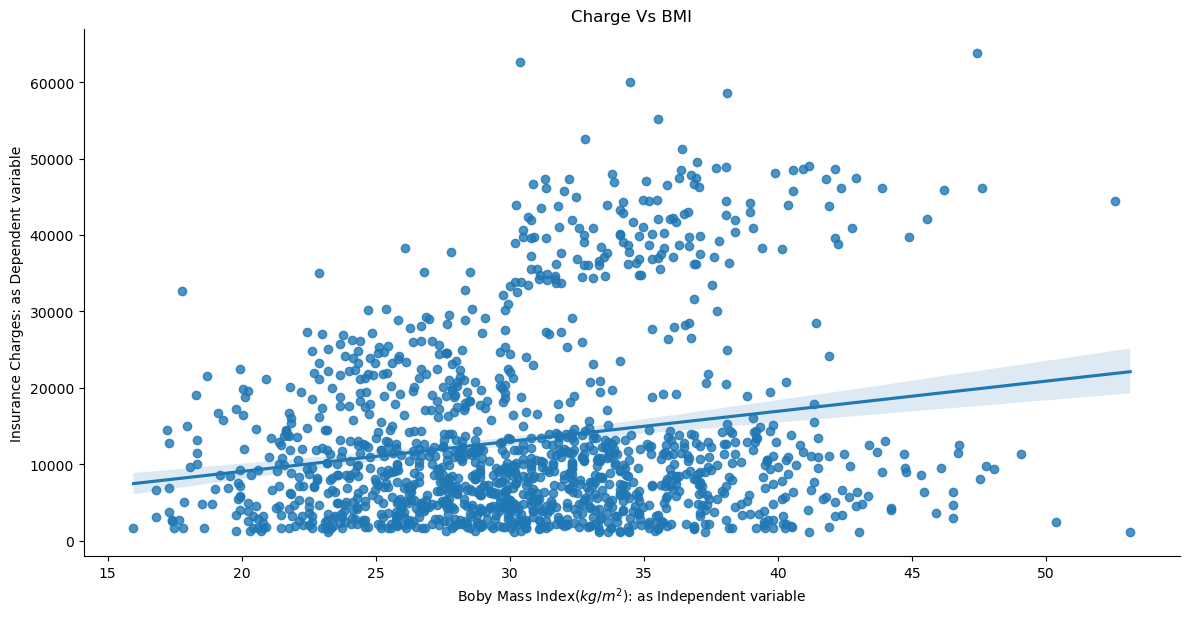

In [96]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

# EDA

In [97]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing values in dataset')

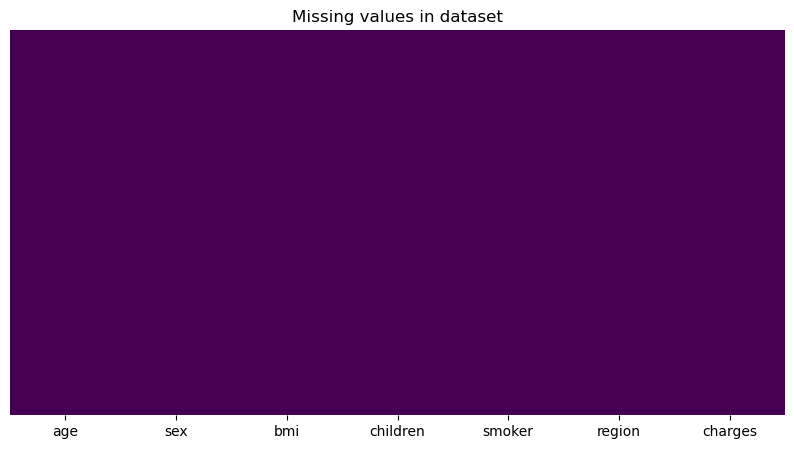

In [98]:
# CHeck for missing values
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis',yticklabels = False)
plt.title("Missing values in dataset")

No missing values in dataset

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9492\1269337199.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

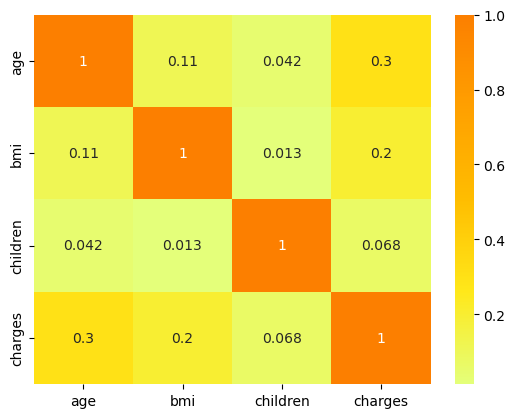

In [99]:
#Correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True)

There is no correlation among variables

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9492\3053299335.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins = 50, color = 'r', ax=ax)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9492\3053299335.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']), bin

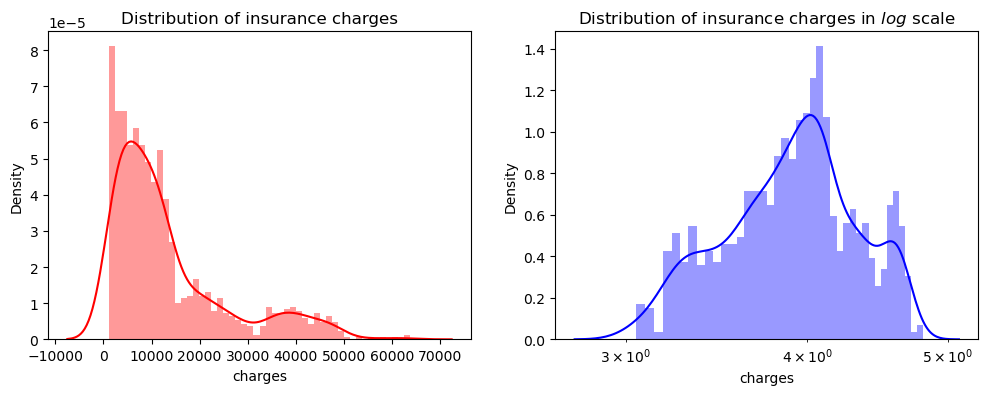

In [100]:
f = plt.figure(figsize = (12,4))

ax = f.add_subplot(121)
sns.distplot(df['charges'], bins = 50, color = 'r', ax=ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins = 40, color = 'b', ax = ax)
ax.set_title("Distribution of insurance charges in $log$ scale")
ax.set_xscale('log');

left plot is right skewed. Natural log is applied on right plot. Plot approx tends to normal. Further analysis is done with log applied on 'charges' i.e the target variable.

Text(0.5, 1.0, 'Violin Plot of Charges vs Smoker')

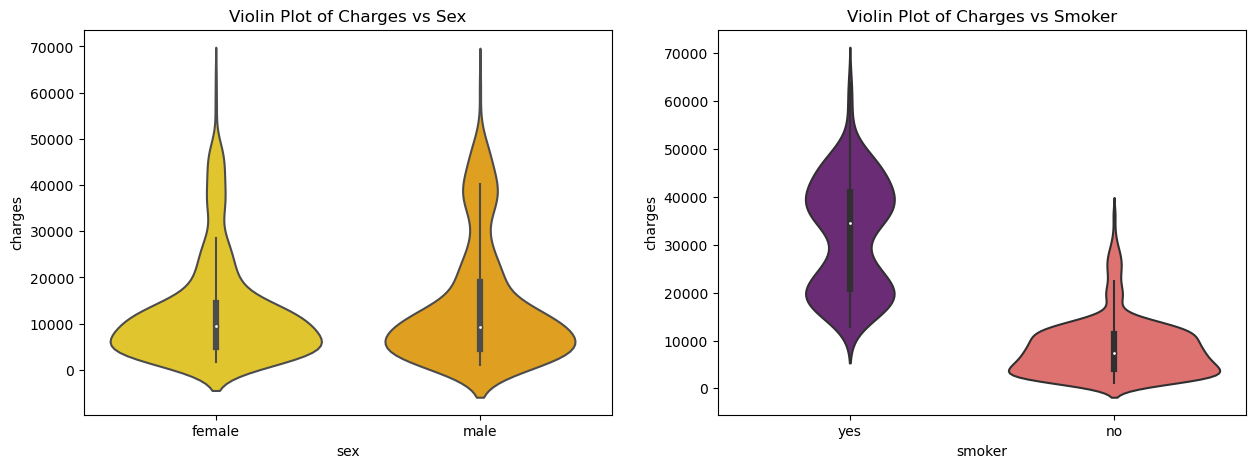

In [101]:
f = plt.figure(figsize = (15,5))

ax = f.add_subplot(121)
sns.violinplot(x = 'sex', y = 'charges', data = df, palette = 'Wistia', ax = ax)
ax.set_title('Violin Plot of Charges vs Sex')

ax = f.add_subplot(122)
sns.violinplot(x = 'smoker', y = 'charges', data = df, palette = 'magma', ax = ax)
ax.set_title('Violin Plot of Charges vs Smoker')

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

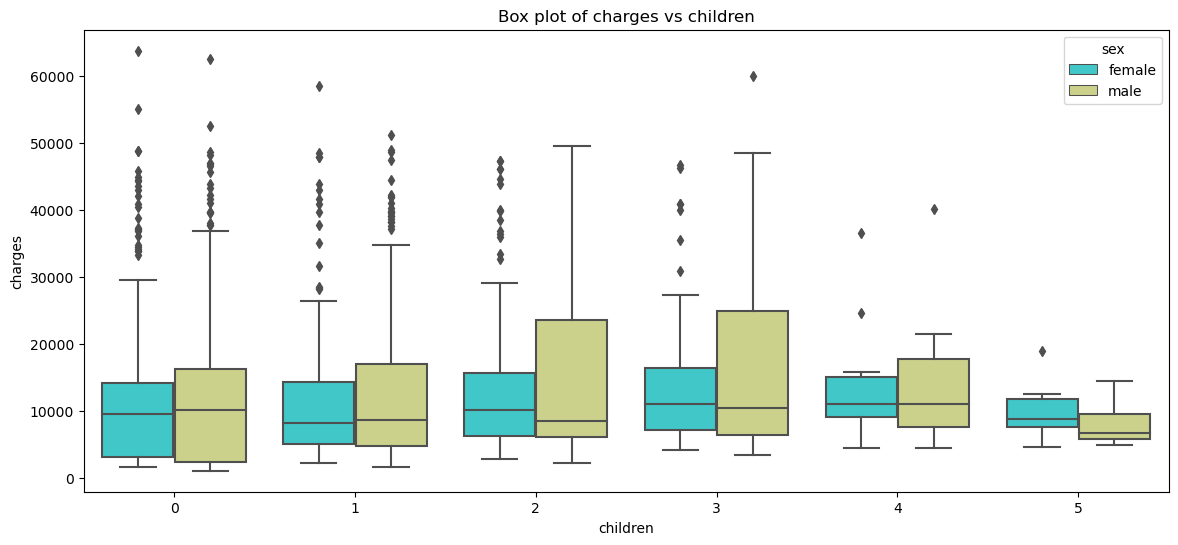

In [102]:
plt.figure(figsize = (14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')
plt.title('Box plot of charges vs children');

In [103]:
df.groupby('children').agg(['mean', 'min', 'max'])['charges']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9492\1812187161.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean', 'min', 'max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin Plot of Charges vs Region')

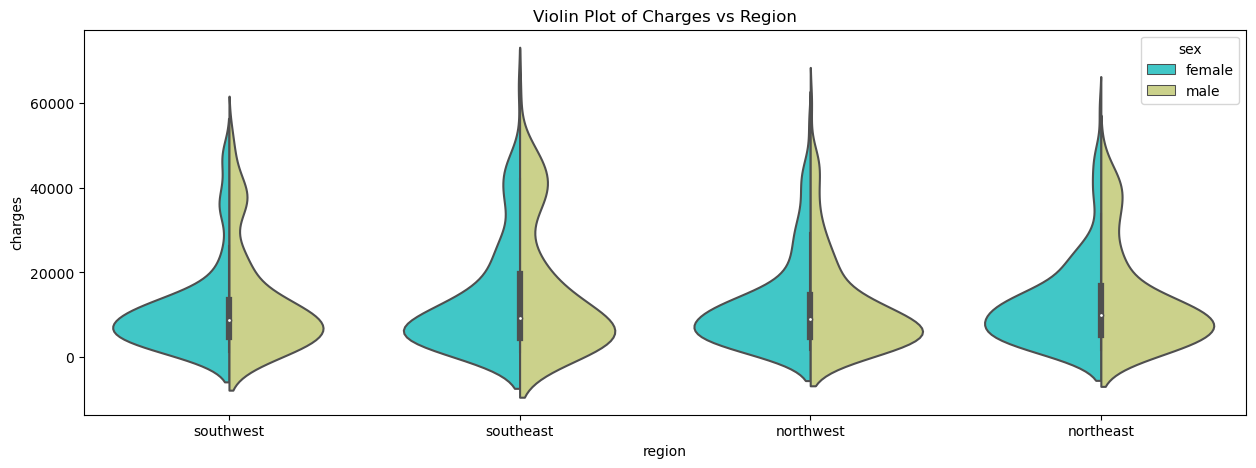

In [104]:
plt.figure(figsize = (15,5))

sns.violinplot(x = 'region', y = 'charges', hue = 'sex', data=df, palette='rainbow', split = True)
plt.title('Violin Plot of Charges vs Region')

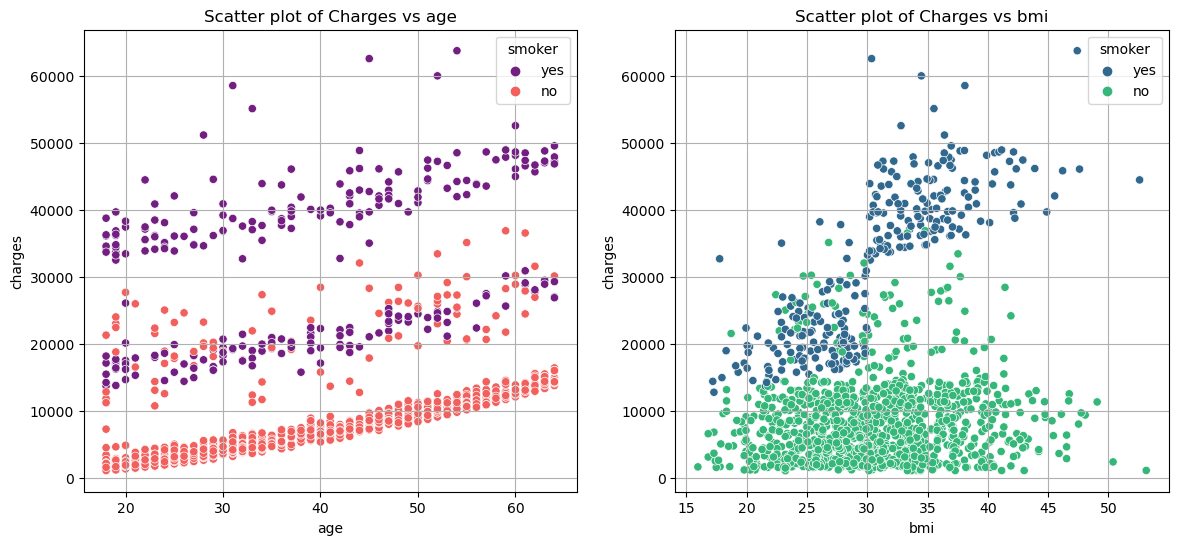

In [105]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')
plt.grid()

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
# plt.savefig('sc.png');
plt.grid()

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st
  and  2nd
  slab, for smoker policy start at  2nd
  and  3rd
  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2
  and maximum upto 54 kg/m2

## DATA PREPROCESSING

In [106]:
#Dummy variable

categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep='', 
                           columns=categorical_columns, 
                           drop_first=True,dtype='int8')

In [107]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHEmale' 'OHE1' 'OHE2' 'OHE3' 'OHE4' 'OHE5'
 'OHEyes' 'OHEnorthwest' 'OHEsoutheast' 'OHEsouthwest']

Number of rows and columns in the dataset: (1338, 13)


## Box-Cox Transformation?

In [108]:
#Log Transform

df_encode['charges'] = np.log(df_encode['charges'])

## TRAIN TEST SPLIT

In [109]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variables
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## MODEL BUILDING/ TRAINING

In [110]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))


In [111]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta}) 

In [112]:
#Using Scikit LEarn Module
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#x_0 =1 is not needed to add.sklearn will take care of it.

#Parameter
sk_theta = [model.intercept_]+list(model.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name = 'Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHEmale,-0.067767,-0.067767
4,theta_4,OHE1,0.149457,0.149457
5,theta_5,OHE2,0.272919,0.272919
6,theta_6,OHE3,0.244095,0.244095
7,theta_7,OHE4,0.523339,0.523339
8,theta_8,OHE5,0.466030,0.466030
9,theta_9,OHEyes,1.550481,1.550481


The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

In [125]:
#USING OLS METHOD FROM STATS API
import statsmodels.api as sm 
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

lr.params

const           7.059171
age             0.033134
bmi             0.013517
OHEmale        -0.067767
OHE1            0.149457
OHE2            0.272919
OHE3            0.244095
OHE4            0.523339
OHE5            0.466030
OHEyes          1.550481
OHEnorthwest   -0.055845
OHEsoutheast   -0.146578
OHEsouthwest   -0.133508
dtype: float64

## Model evaluation

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula
J(θ)=1m∑i=1m(y^i−yi)2
 
R2
  is statistical measure of how close data are to the fitted regression line.  R2
  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

R2=1−SSESST
 
SSE = Sum of Square Error
SST = Sum of Square Total
SSE=∑i=1m(y^i−yi)2
 
SST=∑i=1m(yi−y¯i)2
 
Here  y^
  is predicted value and  y¯
  is mean value of  y
 .

In [113]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)
# y_pred_norm

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298225
R square obtain for normal equation method is : 0.7795687545055277


In [114]:
#Using sklearn regression module
y_pred_sk = model.predict(X_test)

#Evaluation: 
#MSE
from sklearn.metrics import mean_squared_error
mse_sk = mean_squared_error(y_pred_sk, y_test)

#R_square
R_square_sk= model.score(X_test, y_test) #why score works?

print('The Mean Square Error(MSE) or J(theta) is: ',mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)


The Mean Square Error(MSE) or J(theta) is:  0.18729622322981904
R square obtain for scikit learn library is : 0.7795687545055316


## Model Validation

In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be normally distributed.
3. The mean of residual error should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  $VIF = 1/(1 - R^2)$
 , If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9492\602883514.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


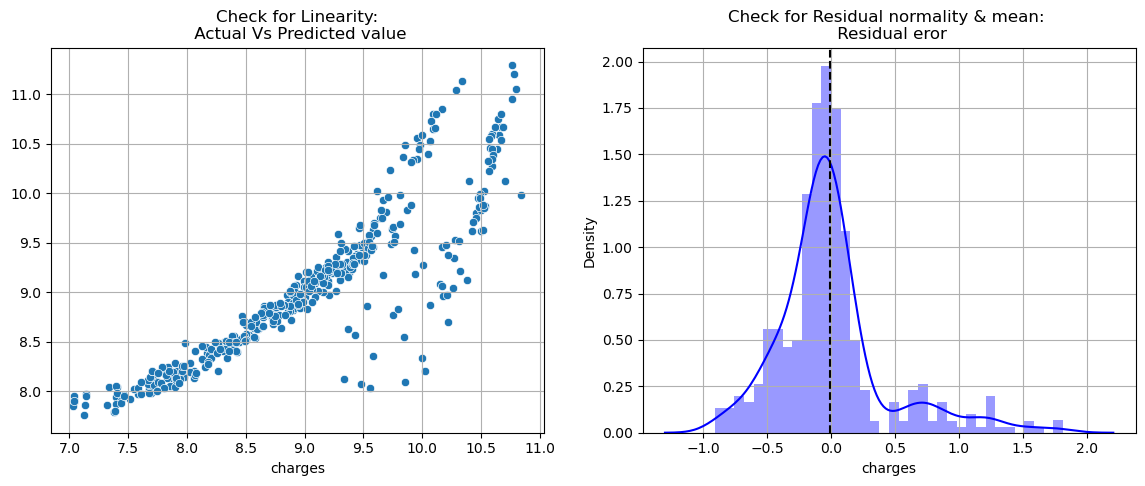

In [121]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x = y_test, y = y_pred_sk)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
plt.grid()

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')
plt.grid();

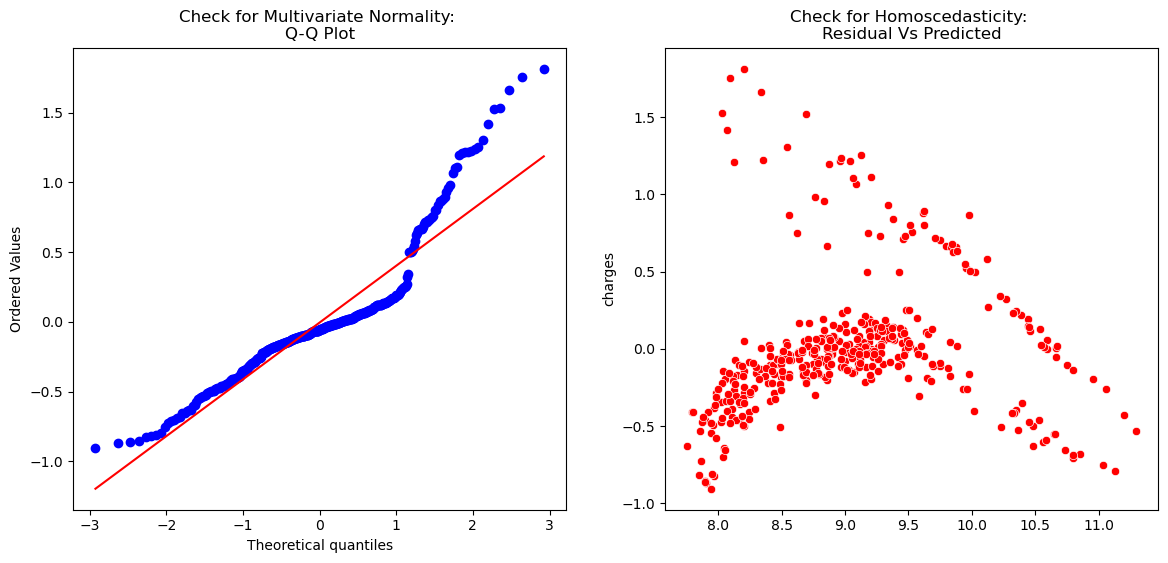

In [123]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [124]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1 - R_square_sk)
VIF

4.536561945911133

The model assumption linear regression as follows

1. In our model the actual vs predicted plot is curve so linear assumption fails
2. The residual mean is zero and residual error plot right skewed
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot is exhibit heteroscedastic, error will insease after certian point.
5. Variance inflation factor value is less than 5, so no multicollearity.